In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install sktime neuralforecast pmdarima darts numpy==1.26.4

In [3]:
import pandas as pd
import numpy as np

df= pd.read_csv('/content/drive/MyDrive/thesis/data/influencer_sample010525.csv')
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df

,post_uid,channel_uid,publishedDate,metrics,potentialReach,source,comments,video_views,engagements,video_plays,shares
0,000075b79f9c314c9dbe766d07016ef0,c149b6fafe123318b768e2e1c716abeb,2022-11-14 16:11:50+00:00,"[{""name"":""facebook_comments"",""value"":""0""},{""na...",21706.0,facebook-content,0.0,0.0,9.0,0.0,NaN
1,0000e07739a036fba13616fa4eb6e9e7,da9acec7669f3db79050175948471cde,2020-01-06 15:10:59+00:00,NaN,20225.0,TWITTER_API,NaN,NaN,NaN,NaN,NaN
2,0001eb4819c534a7a5315eac3ef96e2d,96b6431e916f3f629483d6fa06acf335,2024-11-23 03:01:44+00:00,"[{""name"":""tiktok_video_shares"",""value"":""22""},{...",140500.0,tiktok-content,15.0,0.0,1073.0,157200.0,22.0
3,0001f8ab1ee338b98597bbce534a4b1a,570ef814e5983fc8a152009d2be91bef,2019-08-16 16:06:52+00:00,"[{""name"":""facebook_reactions"",""value"":""120""},{...",69481.0,facebook-content,10.0,0.0,130.0,0.0,1.0
4,000279c0e7a23a8abefbbbb49c740eb6,b95a899244573cf38802aa520ef3a82b,2021-08-18 15:00:42+00:00,"[{""name"":""instagram_comments"",""value"":""6""},{""n...",82089.0,instagram-content,6.0,0.0,4838.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
367068,fffe49cf8576322fb23e683d31f7d5ee,6d58b2d72bed32af821510c6aef723ac,2025-02-24 10:18:28+00:00,NaN,11248.0,instagram-stories-social-data,NaN,NaN,NaN,NaN,NaN
367069,fffe71ee0ced38a49a2cead83aefc0c5,26bf145cbe9c3a10a53c619f05aa750f,2023-06-19 20:42:43+00:00,"[{""name"":""instagram_comments"",""value"":""1""},{""n...",251921.0,instagram-content,1.0,NaN,44.0,5628.0,NaN
367070,fffec68d19ca3dcf8c06aa88202d8c31,d0334d17ea133c5aac89e40ce50404d8,2016-04-14 12:12:13+00:00,NaN,29295.0,instagram-content,NaN,NaN,NaN,NaN,NaN
367071,fffee021bda236f6a839c60fe862307a,8ed4ca5c384d3857a7134e0b93acf87b,2022-07-27 14:43:26+00:00,"[{""name"":""youtube_likes"",""value"":""0""},{""name"":...",18.0,youtube-content,0.0,1.0,0.0,0.0,0.0


In [4]:
df_temp= df.query('channel_uid=="51b52b775df43f1ea0abf5db8789446d"')[['publishedDate', 'video_plays']].dropna()
df_temp = df_temp.set_index('publishedDate').sort_index()
y= df_temp['video_plays']
y = y.sort_index()
y_pos = y.reset_index(drop=True)

#y = y.asfreq('D')
y

,video_plays
publishedDate,
2021-09-09 19:23:35+00:00,4187.0
2021-09-16 12:17:06+00:00,3216.0
2021-09-21 12:15:06+00:00,1914.0
2021-09-22 11:24:18+00:00,656.0
2021-09-25 19:34:55+00:00,1619.0
...,...
2024-12-27 14:01:46+00:00,2017.0
2025-01-07 13:34:13+00:00,2425.0
2025-01-10 10:32:02+00:00,1828.0


<Axes: xlabel='publishedDate'>

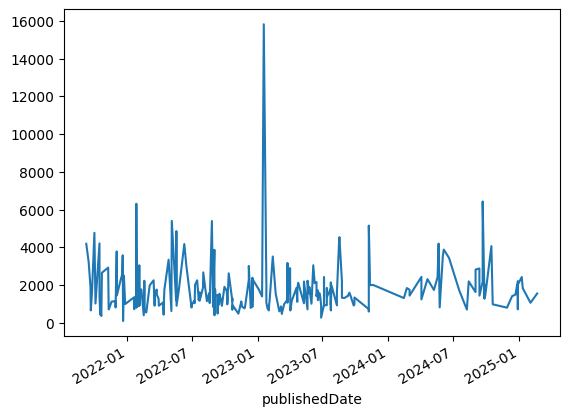

In [5]:
df_temp['video_plays'].plot()

In [6]:
h=6
window=24

In [7]:
summary_df = pd.DataFrame({

})


In [8]:
from sktime.datasets import load_airline
from sktime.forecasting.model_evaluation import evaluate
from sktime.split import ExpandingWindowSplitter
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import MeanAbsoluteError,MeanSquaredError,MeanAbsolutePercentageError

mae = MeanAbsoluteError()
#mse = MeanSquaredError(square_root=False)
rmse= MeanSquaredError(square_root=True)
mape= MeanAbsolutePercentageError()
scoring=[mae, mape,rmse]
scoring_columns=['test_MeanAbsoluteError','test_MeanAbsolutePercentageError','test_MeanSquaredError']
forecaster = NaiveForecaster(strategy="mean", sp=1)
cv = ExpandingWindowSplitter(initial_window=window, step_length=6, fh=np.arange(1, h+1))
results_mean = evaluate(forecaster=forecaster, y=y_pos, cv=cv,scoring=scoring,error_score='raise',strategy="refit",return_data=True,return_model=False)

res_sum_mean=results_mean[scoring_columns].mean()

summary_df['Mean']=res_sum_mean


In [9]:
forecaster = AutoARIMA()

results_arima = evaluate(forecaster=forecaster, y=y_pos, cv=cv,scoring=scoring,error_score='raise',strategy="refit",return_data=True,return_model=False)
res_sum_arima=results_arima[scoring_columns].mean()

summary_df['Autoarima']=res_sum_arima

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [10]:
from sktime.forecasting.theta import ThetaForecaster
#from sktime.forecasting.tbats import  TBATS
from sktime.forecasting.ets import AutoETS
#forecaster_tbats = TBATS(sp=1)
#results_tbats = evaluate(
#    forecaster=forecaster_tbats, y=y_pos, cv=cv, scoring=scoring,
#    error_score='raise', strategy="refit", return_data=True, return_model=False
#)
#res_sum_tbats = results_tbats[scoring_columns].mean()



In [11]:
# 3. ETS
forecaster_ets = AutoETS()
results_ets = evaluate(
    forecaster=forecaster_ets, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_ets = results_ets[scoring_columns].mean()

summary_df['ETS']=res_sum_ets

In [12]:
# 4. Theta
forecaster_theta = ThetaForecaster(sp=1)
results_theta = evaluate(
    forecaster=forecaster_theta, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_theta = results_theta[scoring_columns].mean()
summary_df['Theta']=res_sum_theta

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

In [13]:
from sktime.forecasting.neuralforecast import NeuralForecastLSTM
forecaster_ltsm = NeuralForecastLSTM(max_steps=10)
#cv = ExpandingWindowSplitter(initial_window=24, step_length=6, fh=np.arange(1, h+1))
results_ltsm = evaluate(
    forecaster=forecaster_ltsm, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_ltsm = results_ltsm[scoring_columns].mean()
summary_df['LTSM']=res_sum_ltsm

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/neuralforecast/models/lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utiliti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [14]:
from sktime.forecasting.auto_reg import AutoREG
forecaster_reg = AutoREG(lags=4)
#cv = ExpandingWindowSplitter(initial_window=window, step_length=6, fh=np.arange(1, h+1))
results_reg = evaluate(
    forecaster=forecaster_reg, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_reg = results_reg[scoring_columns].mean()

summary_df["AutoREG(4)"] = res_sum_reg


In [15]:
from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet

forecaster_prophet = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12))
results_prophet = evaluate(
    forecaster=forecaster_prophet, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_prophet = results_prophet[scoring_columns].mean()
summary_df['Prophet']=res_sum_prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1knj9f0/3n_8xwhs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1knj9f0/2x3p1o12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2968', 'data', 'file=/tmp/tmpj1knj9f0/3n_8xwhs.json', 'init=/tmp/tmpj1knj9f0/2x3p1o12.json', 'output', 'file=/tmp/tmpj1knj9f0/prophet_modelvmi4bi31/prophet_model-20250504182134.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [16]:
#summary_df = pd.DataFrame({
#    'reg':res_sum_reg,
#    "AutoARIMA": res_sum_arima,
#    "Naive": res_sum_mean,
#    "ETS": res_sum_ets,
#    "Theta": res_sum_theta,
#    "LTSM":res_sum_ltsm,
#    'Prophet':res_sum_prophet
#})

print(summary_df)

                                         Mean    Autoarima          ETS  \
test_MeanAbsoluteError             839.078902   838.912952   857.408937   
test_MeanAbsolutePercentageError     0.703375     0.703106     0.718755   
test_MeanSquaredError             1097.046467  1096.787585  1129.566807   

                                        Theta         LTSM   AutoREG(4)  \
test_MeanAbsoluteError             848.867924   817.619796   849.754389   
test_MeanAbsolutePercentageError     0.673137     0.605842     0.701761   
test_MeanSquaredError             1131.460824  1130.745262  1124.659344   

                                      Prophet  
test_MeanAbsoluteError             835.826547  
test_MeanAbsolutePercentageError     0.594829  
test_MeanSquaredError             1164.366542  
